# Colab

For this example of using Colab, I use a powerful GPU box to generate a cool image!

This example needs an A100 box to run. That may cost a couple of dollars to run, so I'm saving the results here so you can see the output without needing to use an A100. But if you don't mind the spend then it's a lot of fun! You can also substitute in a cheaper model if you'd prefer.

**Transfer Learning:** Hugging Face models are pre-trained on massive datasets and can be fine-tuned on specific tasks with minimal computational resources.

**Google Colab Integration:** Colab provides a cloud-based Python environment with hardware acceleration (e.g., GPUs or TPUs), ideal for working with large AI models.

## *Technical Details:*
* These libraries abstract many complexities, allowing developers to use pre-trained models or fine-tune them for custom tasks.
* Hugging Face supports integration with various frameworks (e.g., PyTorch, TensorFlow) to enable interoperability.

## *diffusers:* 
A library by Hugging Face designed to work with diffusion models, often used for generative tasks like image synthesis (e.g., Stable Diffusion).
## *transformers:*  
A core Hugging Face library that provides pre-trained transformer-based models (like GPT, BERT, and others) for NLP and other AI tasks.
## *accelerate:*  
A library that helps with hardware acceleration (e.g., utilizing GPUs, multi-GPU setups, or TPUs) for running deep learning models more efficiently.

## *Relevant Concepts:*

* *Transformers Architecture:* The transformer model is foundational to modern NLP and LLMs. Key components include attention mechanisms, positional encoding, and scalability for large datasets and tasks.
* *Diffusion Models:* These are generative models that gradually transform random noise into coherent data, typically used for image generation.

In [ ]:
!pip install diffusers transformers accelerate

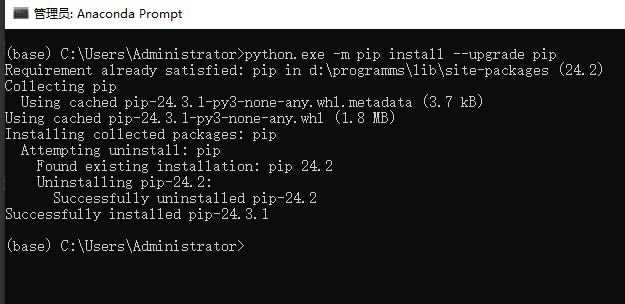

# Important Note

You may need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then Create a new API token, giving yourself write permissions.

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab. There's also a shortcut to simply overwrite the line below with:  
`hf_token = "hf_...."`  
But this isn't a best practice, as you'd have to be careful not to share the colab. And one of the great things about colabs is that you can share them!

## *Purpose:* 
These imports bring in functions and utilities to manage authentication and user-specific data

## *Mechanism:* 
* Hugging Face provides a platform for hosting and sharing pre-trained models. Accessing private or restricted models requires authentication, which is done using an API token (e.g., HF_TOKEN).
* In Colab, userdata.get safely retrieves sensitive information (like tokens) stored during the session.

In [ ]:
# login: A function from the Hugging Face Hub library to authenticate and interact with Hugging Face’s online platform.
from huggingface_hub import login
# userdata: A Google Colab module to securely retrieve user-provided data (like API keys).
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN') # Fetch the Hugging Face API token stored in the Colab session.

login(hf_token, add_to_git_credential=True) # Authenticates the user to Hugging Face Hub using the provided token
# The login function securely sends the token to Hugging Face’s servers for verification.
# add_to_git_credential: If set to True, this option saves the token for future Git interactions with Hugging Face repositories.

In [ ]:
# PyTorch is a popular deep learning library for tensor computations, GPU acceleration, and neural network development.
import torch
# FluxPipeline is a pipeline from the Hugging Face diffusers library specifically tailored for working with diffusion-based models like FLUX.
# Text-to-Image Generation: Models like FLUX use cross-modal embeddings to translate text descriptions into visual data.
from diffusers import FluxPipeline

# This loads the FLUX.1-schnell diffusion model, hosted on Hugging Face, and prepares it for inference.
# FluxPipeline.from_pretrained: Downloads and initializes a pre-trained model from the specified repository.
# torch_dtype=torch.bfloat16：Configures the model to use the bfloat16 (brain floating-point 16-bit) precision, which is efficient for GPU computations while maintaining numerical stability.
# .to("cuda"): Transfers the model to the GPU for faster processing.
pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16).to("cuda")

# Defines a random number generator (RNG) seeded with 0 for reproducibility.
# Reproducibility: Setting seeds ensures that the output remains consistent across runs, a critical practice in ML for validation and debugging
# torch.Generator: A PyTorch object for generating random numbers on a specific device (GPU in this case).
# manual_seed(0): Ensures the same random values are generated each time the code is run, which is important for debugging or reproducing results.
generator = torch.Generator(device="cuda").manual_seed(0)

# The prompt guides the model to generate an image aligned with the specified description.
prompt = "A futuristic class full of students learning AI coding in the surreal style of Salvador Dali"

# Executes the diffusion pipeline to generate an image based on the given prompt using the GPU.
image = pipe(
    prompt, # The input text guiding the generation process
    # Controls how strongly the generated output adheres to the prompt.
    guidance_scale=0.0, #  A scale of 0.0 ignores the prompt, allowing the model's prior knowledge to dominate.
    # Defines the number of denoising steps in the diffusion process.
    num_inference_steps=4, # Fewer steps are faster but may sacrifice image quality.
    # Sets the maximum number of tokens in the prompt. Prompts longer than this will be truncated
    max_sequence_length=256,
    # Ensures consistent results via the seeded RNG.
    generator=generator
).images[0] # Extracts the first (or only) generated image from the pipeline’s output.

image.save("surreal.png") # The image object has a save method, allowing it to be exported in standard formats like PNG.

In [ ]:
# IPython.display.display: This module is part of IPython (the interactive Python environment used in Jupyter Notebook).
# IPython.display.display: It is used to display objects (like images, text, or HTML) inline in a Jupyter Notebook or Colab environment.
from IPython.display import display

# PIL.Image:Python Imaging Library (PIL) provides functions to create, manipulate, and save image files.
from PIL import Image

# Display the image object directly in the notebook or Colab interface.
# The display function renders the image inline.
# The image object is created in the previous code snippet using the diffusion pipeline and is compatible with the PIL library.
display(image)

## **Hugging Face Datasets:**
This library simplifies loading, processing, and sharing datasets for NLP, vision, and other tasks. It includes utilities for creating custom datasets or loading pre-existing ones directly from Hugging Face Hub.

In [ ]:
# Installs the datasets library by Hugging Face, which provides access to a wide variety of machine learning datasets.
!pip install datasets

In [ ]:
# transformers: Provides pre-trained transformer-based models and pipelines for various tasks (e.g., text-to-speech, text generation, and summarization).
from transformers import pipeline
# datasets:A Hugging Face library for loading and processing datasets, simplifying access to machine learning data.
from datasets import load_dataset
# soundfile:A Python library for reading and writing sound files in various formats (e.g., WAV, FLAC).
import soundfile as sf
# torch:PyTorch is used for tensor computations and GPU acceleration.
import torch

# Initializes a pre-trained text-to-speech (TTS) pipeline using the SpeechT5 model hosted by Hugging Face.
# "text-to-speech":Specifies the task type, instructing the pipeline to perform TTS.
# "microsoft/speecht5_tts":Refers to the specific pre-trained model to use.
# SpeechT5 by Microsoft is a transformer-based model capable of generating natural-sounding speech from text inputs.
# device='cuda':Runs the pipeline on a GPU for faster processing.
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

# Loads a dataset containing pre-computed speaker embeddings, enabling the TTS system to mimic specific speaker styles.
# "Matthijs/cmu-arctic-xvectors": A dataset containing speaker embeddings (x-vectors) derived from the CMU Arctic corpus.
# split="validation":Loads the validation subset of the dataset for use.
# SpeechT5 can use these embeddings to synthesize speech in the style of a particular speaker.
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

# Extracts a specific speaker embedding from the dataset for use in speech synthesis.
# embeddings_dataset[7306]:Accesses the 7306th entry in the dataset, which contains an xvector representing a speaker.
# torch.tensor():Converts the embedding into a PyTorch tensor for compatibility with the SpeechT5 model.
# .unsqueeze(0):Adds an extra dimension to the tensor, making it suitable for batch processing.
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

# Converts the input text into speech, applying the specified speaker’s style using the embedding.
# forward_params={"speaker_embeddings": speaker_embedding}:Passes the speaker embedding to the model to control the voice characteristics in the synthesized audio.
speech = synthesiser("Hi to an artificial intelligence engineer on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

# Saves the generated audio to a file (speech.wav).
# speech["audio"]:The synthesized audio waveform (a NumPy array) generated by the pipeline.
# speech["sampling_rate"]: The sampling rate (e.g., 16,000 Hz) required to correctly encode the audio.
# sf.write: Writes the waveform data to a .wav file.
sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

In [ ]:
# The Audio class from IPython allows embedding and playing audio files directly within a Jupyter Notebook or Colab environment.
# This makes it easy to interact with audio outputs during experiments, especially for TTS applications.
from IPython.display import Audio

# Loads the previously saved audio file (speech.wav) and prepares it for playback.
Audio("speech.wav") # Play the generated audio